In [1]:
import os 
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("D:/credit suisse")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import lfilter

In [4]:
df1=pd.read_csv('TECHM.NS.csv')
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-04-04,244.000000,248.225006,240.662994,244.250000,217.479950,3446784.0
1,2013-04-05,245.725006,245.725006,239.274994,240.462006,214.107101,1188644.0
2,2013-04-08,241.449997,247.850006,240.875000,245.988007,219.027451,1787424.0
3,2013-04-09,248.037994,248.462006,240.811996,241.787994,215.287781,1417476.0
4,2013-04-10,244.024994,251.250000,242.011993,249.636993,222.276535,1055748.0
5,2013-04-11,251.250000,252.500000,245.561996,249.175003,221.865173,892204.0
6,2013-04-12,242.500000,247.125000,238.287994,245.000000,218.147720,1530756.0
7,2013-04-15,243.500000,245.688004,241.250000,242.488007,215.911072,766528.0
8,2013-04-16,242.250000,245.000000,240.250000,243.162994,216.512070,776852.0
9,2013-04-17,244.449997,245.725006,238.000000,238.800003,212.627274,830496.0


In [5]:
df1.shape

(1232, 7)

In [6]:
df1.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [7]:
df1['Date']=pd.to_datetime(df1['Date'])

In [8]:
df1.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [9]:
df1.fillna(df1.mean(),inplace=True)

In [10]:
close_zero=df1.iloc[-1].Close

In [11]:
df1['HL_PCT'] = (df1['High'] - df1['Low'])/(df1['Low']*100)

In [12]:
df1['PCT_CHNG_OpCl'] = (df1['Close'] - df1['Open'])/(df1['Open']*100)

In [13]:
df1['PCT_CHNG_CLOSE'] = (df1['Close'] - df1['Adj Close'])/(df1['Adj Close']*100)

In [14]:
df1.index=df1['Date']

In [15]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE
Date,,,,,,,,,,
2013-04-04,2013-04-04,244.000000,248.225006,240.662994,244.250000,217.479950,3446784.0,0.000314,0.000010,0.001231
2013-04-05,2013-04-05,245.725006,245.725006,239.274994,240.462006,214.107101,1188644.0,0.000270,-0.000214,0.001231
2013-04-08,2013-04-08,241.449997,247.850006,240.875000,245.988007,219.027451,1787424.0,0.000290,0.000188,0.001231
2013-04-09,2013-04-09,248.037994,248.462006,240.811996,241.787994,215.287781,1417476.0,0.000318,-0.000252,0.001231
2013-04-10,2013-04-10,244.024994,251.250000,242.011993,249.636993,222.276535,1055748.0,0.000382,0.000230,0.001231


In [16]:
df=df1[['Open','High','Low','Adj Close','Volume','HL_PCT','PCT_CHNG_OpCl','PCT_CHNG_CLOSE','Close']]

## Prediction for 30th Day

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import datetime

C:\Users\Debadri\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


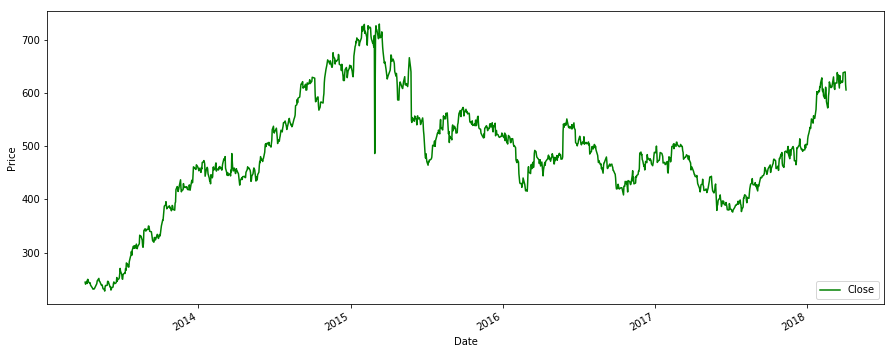

In [18]:
df['Close'].plot(figsize=(15,6), color="green")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [19]:
df.tail()

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close
Date,,,,,,,,,
2018-03-27,625.000000,629.599976,619.000000,621.650024,1135697.0,0.000171,-0.000054,0.0,621.650024
2018-03-28,621.200012,641.000000,616.650024,638.700012,5534298.0,0.000395,0.000282,0.0,638.700012
2018-04-02,638.700012,646.500000,634.099976,640.299988,2095519.0,0.000196,0.000025,0.0,640.299988
2018-04-03,636.500000,638.000000,613.500000,615.950012,3851192.0,0.000399,-0.000323,0.0,615.950012
2018-04-04,618.000000,622.000000,603.250000,606.299988,2670676.0,0.000311,-0.000189,0.0,606.299988


In [20]:
forecast_col = 'Close'

forecast_out = int(42)
# We will drop 12 columns because there are 12 holidays

In [21]:
df['label'] = df[forecast_col].shift(-forecast_out)
print(df.head(2))

                  Open        High         Low   Adj Close     Volume  \
Date                                                                    
2013-04-04  244.000000  248.225006  240.662994  217.479950  3446784.0   
2013-04-05  245.725006  245.725006  239.274994  214.107101  1188644.0   

              HL_PCT  PCT_CHNG_OpCl  PCT_CHNG_CLOSE       Close       label  
Date                                                                         
2013-04-04  0.000314       0.000010        0.001231  244.250000  231.250000  
2013-04-05  0.000270      -0.000214        0.001231  240.462006  234.238007  


In [22]:
X = np.array(df.drop(['label'], 1))

In [23]:
X = preprocessing.scale(X)

In [24]:
X_forecast_out = X[-forecast_out:]
X = X[:-forecast_out]

In [25]:
y = np.array(df['label'])
y = y[:-forecast_out]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
print("Accuracy of our prediction model",clf.score(X_test, y_test)*100,"%")

Accuracy of our prediction model 69.25808857657995 %


In [29]:
# Taking first 30 values since 12 days are holidays

forecast_prediction = clf.predict(X_forecast_out)
print(forecast_prediction[:30])

[578.54359184 586.64174869 581.67206581 591.93907465 583.01126274
 571.46447504 568.53871758 570.67148435 564.92052458 577.00665215
 578.74462445 546.25190011 541.30271275 558.36203887 555.24390259
 581.38173474 587.93867248 583.85512145 576.17624118 585.41196634
 586.3705474  586.04832048 581.57807384 576.98604042 578.62781089
 587.78988455 591.66162876 591.78669141 597.90193131 591.33401111]


In [30]:
df['forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_prediction:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

In [31]:
df

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2013-04-04 00:00:00,244.000000,248.225006,240.662994,217.479950,3446784.0,0.000314,0.000010,0.001231,244.250000,231.250000,NaN
2013-04-05 00:00:00,245.725006,245.725006,239.274994,214.107101,1188644.0,0.000270,-0.000214,0.001231,240.462006,234.238007,NaN
2013-04-08 00:00:00,241.449997,247.850006,240.875000,219.027451,1787424.0,0.000290,0.000188,0.001231,245.988007,235.087006,NaN
2013-04-09 00:00:00,248.037994,248.462006,240.811996,215.287781,1417476.0,0.000318,-0.000252,0.001231,241.787994,242.000000,NaN
2013-04-10 00:00:00,244.024994,251.250000,242.011993,222.276535,1055748.0,0.000382,0.000230,0.001231,249.636993,244.699997,NaN
2013-04-11 00:00:00,251.250000,252.500000,245.561996,221.865173,892204.0,0.000283,-0.000083,0.001231,249.175003,242.912994,NaN
2013-04-12 00:00:00,242.500000,247.125000,238.287994,218.147720,1530756.0,0.000371,0.000103,0.001231,245.000000,241.438004,NaN
2013-04-15 00:00:00,243.500000,245.688004,241.250000,215.911072,766528.0,0.000184,-0.000042,0.001231,242.488007,242.850006,NaN
2013-04-16 00:00:00,242.250000,245.000000,240.250000,216.512070,776852.0,0.000198,0.000038,0.001231,243.162994,244.462006,NaN


In [32]:
pred=df[-42:]

In [33]:
df=df[:-42]

In [34]:
pred

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2018-04-05 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,578.543592
2018-04-06 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,586.641749
2018-04-07 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581.672066
2018-04-08 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,591.939075
2018-04-09 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,583.011263
2018-04-10 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,571.464475
2018-04-11 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568.538718
2018-04-12 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,570.671484
2018-04-13 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,564.920525


In [35]:
pred=pred.reset_index()

In [36]:
pred['Date']=pred['Date'].dt.date

In [37]:
pred.head(1)

,Date,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
0,2018-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,578.543592


In [38]:
holidays=['2018-04-07','2018-04-08','2018-04-14','2018-04-15','2018-04-21','2018-04-22','2018-04-28','2018-04-29','2018-05-01','2018-05-05','2018-05-06','2018-05-12','2018-05-13']

In [39]:
pred['Date']=pred['Date'].apply(str)

In [40]:
for i in holidays:
    pred = pred.drop(pred[pred.Date==i].index)

In [41]:
pred['Date']=pd.to_datetime(pred['Date'])

In [42]:
pred.drop('forecast',axis=1,inplace=True)

In [43]:
pred.shape

(29, 11)

In [44]:
pred['forecast']=forecast_prediction[:29]

In [45]:
pred

,Date,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
0,2018-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,578.543592
1,2018-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,586.641749
4,2018-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581.672066
5,2018-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,591.939075
6,2018-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,583.011263
7,2018-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,571.464475
8,2018-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568.538718
11,2018-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,570.671484
12,2018-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,564.920525
13,2018-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,577.006652


In [46]:
pred.index=pred['Date']
pred.drop('Date',axis=1,inplace=True)

In [47]:
df=df.append(pred)

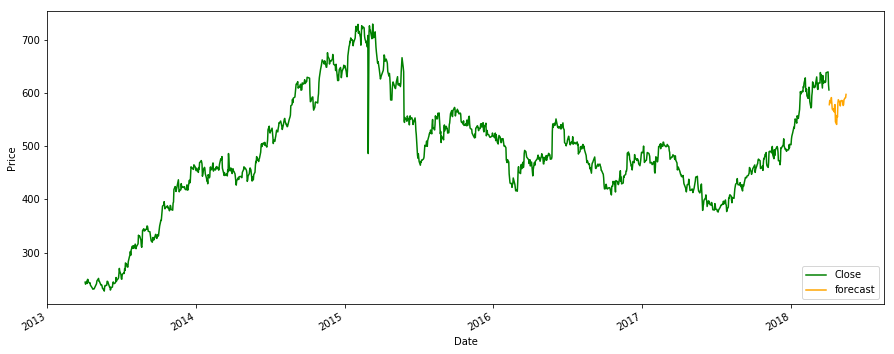

In [48]:
df['Close'].plot(figsize=(15,6), color="green")
df['forecast'].plot(figsize=(15,6), color="orange")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

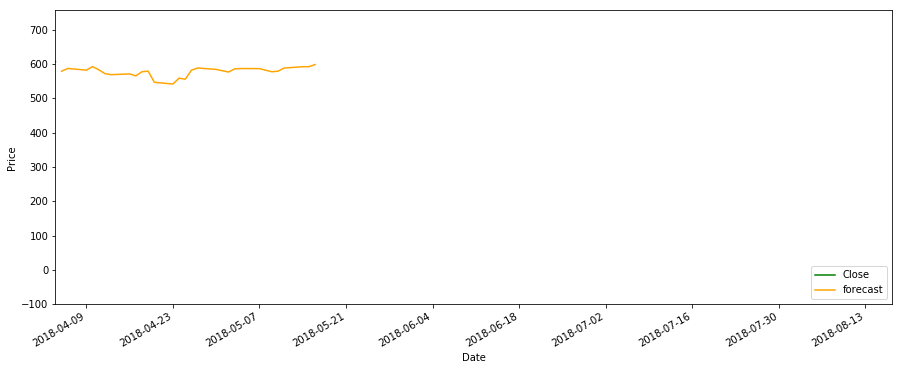

In [49]:
df['Close'].plot(figsize=(15,6), color="green")
df['forecast'].plot(figsize=(15,6), color="orange")
plt.xlim(xmin=datetime.date(2018, 4, 4))
plt.ylim(ymin=-100)
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [50]:
df.iloc[-1]

Open                     NaN
High                     NaN
Low                      NaN
Adj Close                NaN
Volume                   NaN
HL_PCT                   NaN
PCT_CHNG_OpCl            NaN
PCT_CHNG_CLOSE           NaN
Close                    NaN
label                    NaN
forecast          597.901931
Name: 2018-05-16 00:00:00, dtype: float64

In [51]:
close_last=df.iloc[-1].forecast

In [52]:
pred_return=close_last-close_zero
print("Predicted Return: Rs.",pred_return)

Predicted Return: Rs. -8.39805669221164


## Simple Moving Average (30,40,50)

In [53]:
# For 30 days
short_rolling = df.rolling(window=30).mean()
short_rolling.head(30)

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# For 40 days
med_rolling = df.rolling(window=40).mean()
med_rolling.tail(10)

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2018-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# For 50 days
long_rolling = df.rolling(window=50).mean()
long_rolling.tail(10)

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2018-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0,0.5,'Price in Rs.')

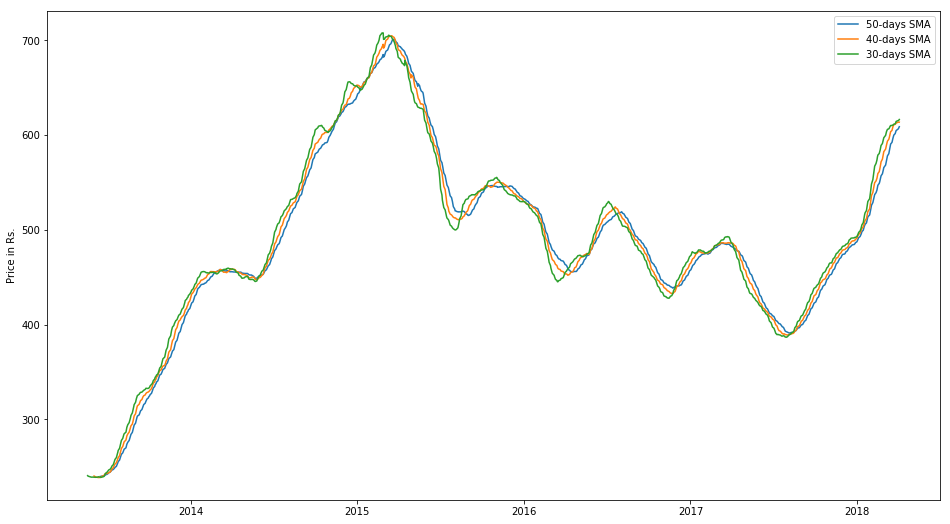

In [56]:
start_date = '2013-04-29'
end_date = '2018-04-04'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'Close'], label = '50-days SMA')
ax.plot(med_rolling.loc[start_date:end_date, :].index, med_rolling.loc[start_date:end_date, 'Close'], label = '40-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Close'], label = '30-days SMA')


ax.legend(loc='best')
ax.set_ylabel('Price in Rs.')


## Exponential Moving Average (30,40,50)

Text(0,0.5,'Price in Rs.')

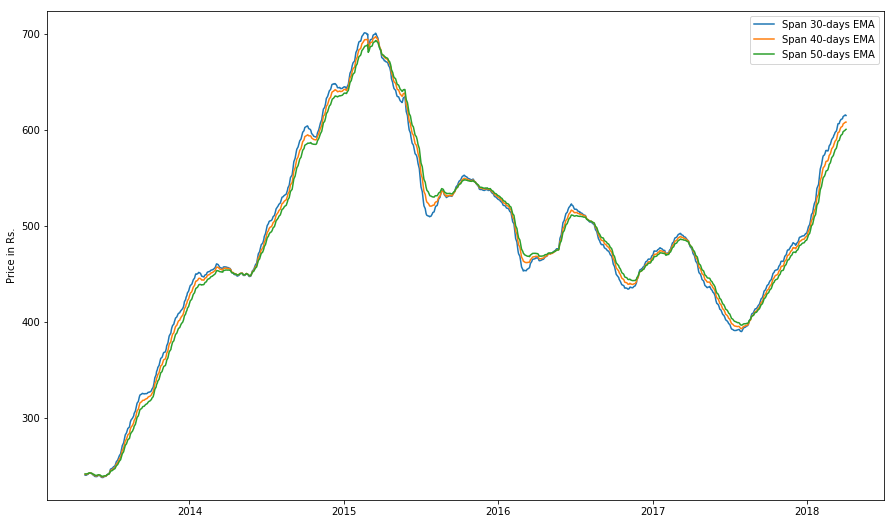

In [57]:
ema_short = df.ewm(span=30, adjust=False).mean()
ema_med = df.ewm(span=40, adjust=False).mean()
ema_long = df.ewm(span=50, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Close'], label = 'Span 30-days EMA')
ax.plot(ema_med.loc[start_date:end_date, :].index, ema_med.loc[start_date:end_date, 'Close'], label = 'Span 40-days EMA')
ax.plot(ema_long.loc[start_date:end_date, :].index, ema_long.loc[start_date:end_date, 'Close'], label = 'Span 50-days EMA')

ax.legend(loc='best')
ax.set_ylabel('Price in Rs.')

## Aroon Oscillator (30,40,50)

In [58]:
from pandas.stats import moments
from pandas import DataFrame

In [59]:
def aroon(s, n):
    up = 100 * moments.rolling_apply(s.High, n + 1, lambda x: x.argmax()) / n
    dn = 100 * moments.rolling_apply(s.Low, n + 1, lambda x: x.argmin()) / n

    return DataFrame(dict(up=up, down=dn))

In [60]:
ao30=aroon(df,30)
ao40=aroon(df,40)
ao50=aroon(df,50)

In [61]:
ao30

,down,up
Date,,
2013-04-04,NaN,NaN
2013-04-05,NaN,NaN
2013-04-08,NaN,NaN
2013-04-09,NaN,NaN
2013-04-10,NaN,NaN
2013-04-11,NaN,NaN
2013-04-12,NaN,NaN
2013-04-15,NaN,NaN
2013-04-16,NaN,NaN


Text(0,0.5,'Change in Price in Rs.')

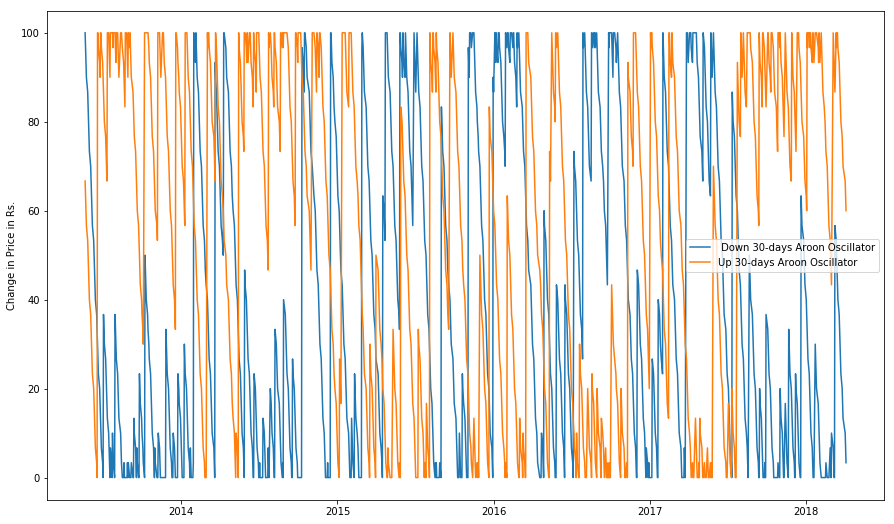

In [62]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'down'], label = ' Down 30-days Aroon Oscillator')
ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'up'], label = 'Up 30-days Aroon Oscillator')


ax.legend(loc='best')
ax.set_ylabel('Change in Price in Rs.')

Text(0,0.5,'Change in Price in Rs.')

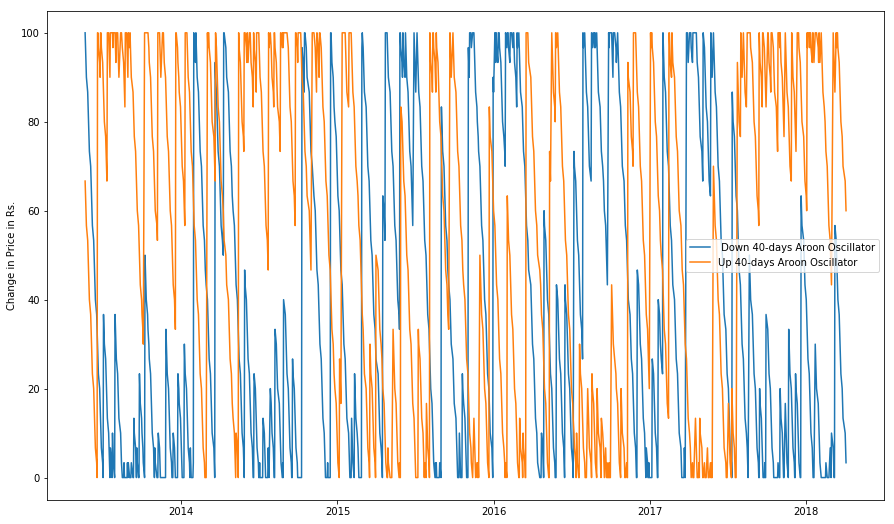

In [63]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'down'], label = ' Down 40-days Aroon Oscillator')
ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'up'], label = 'Up 40-days Aroon Oscillator')


ax.legend(loc='best')
ax.set_ylabel('Change in Price in Rs.')

Text(0,0.5,'Change in Price in Rs.')

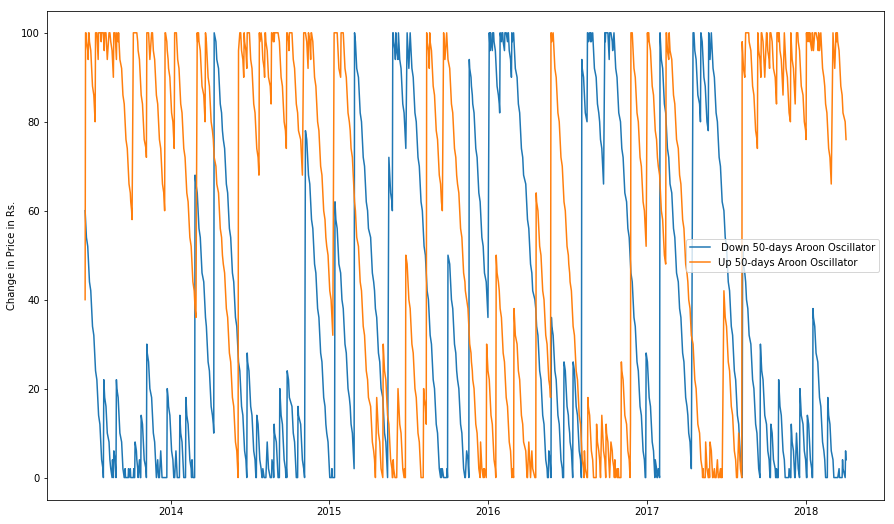

In [64]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ao50.loc[start_date:end_date, :].index, ao50.loc[start_date:end_date, 'down'], label = ' Down 50-days Aroon Oscillator')
ax.plot(ao50.loc[start_date:end_date, :].index, ao50.loc[start_date:end_date, 'up'], label = 'Up 50-days Aroon Oscillator')


ax.legend(loc='best')
ax.set_ylabel('Change in Price in Rs.')

## MACD Signal

In [65]:
def ema(s, n, wilder=False):
    span = n if not wilder else 2*n - 1
    return moments.ewma(s, span=span)


def macd(s, nfast=12, nslow=26, nsig=9, percent=True):
    fast, slow = ema(s, nfast), ema(s, nslow)

    if percent:
        macd = 100*(fast / slow - 1)
    else:
        macd = fast - slow

    sig = ema(macd, nsig)
    hist = macd - sig

    return DataFrame(dict(macd=macd, signal=sig, hist=hist,
                          fast=fast, slow=slow))

In [66]:
m=macd(df['Close'])

In [67]:
m.head(1)

,fast,hist,macd,signal,slow
Date,,,,,
2013-04-04,244.25,0.0,0.0,0.0,244.25


Text(0,0.5,'Change ')

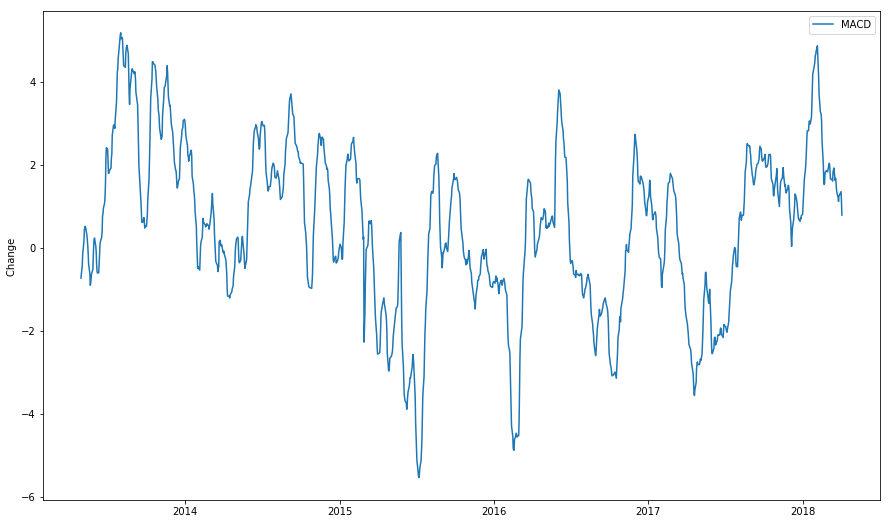

In [68]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(m.loc[start_date:end_date, :].index, m.loc[start_date:end_date, 'macd'], label = 'MACD')

ax.legend(loc='best')
ax.set_ylabel('Change ')

## Relative Strength Index (RSI)

In [69]:
def rsi(s, n=14):
    diff = s.diff()
    which_dn = diff < 0

    up, dn = diff, diff*0
    up[which_dn], dn[which_dn] = 0, -up[which_dn]

    emaup = ema(up, n, wilder=True)
    emadn = ema(dn, n, wilder=True)

    return 100 * emaup/(emaup + emadn)

In [70]:
sf=rsi(df['Close'],50)

In [71]:
sfd=pd.DataFrame({'Date':sf.index, 'RSI':sf.values})

In [72]:
sfd.index=sfd['Date']

Text(0,0.5,'Change')

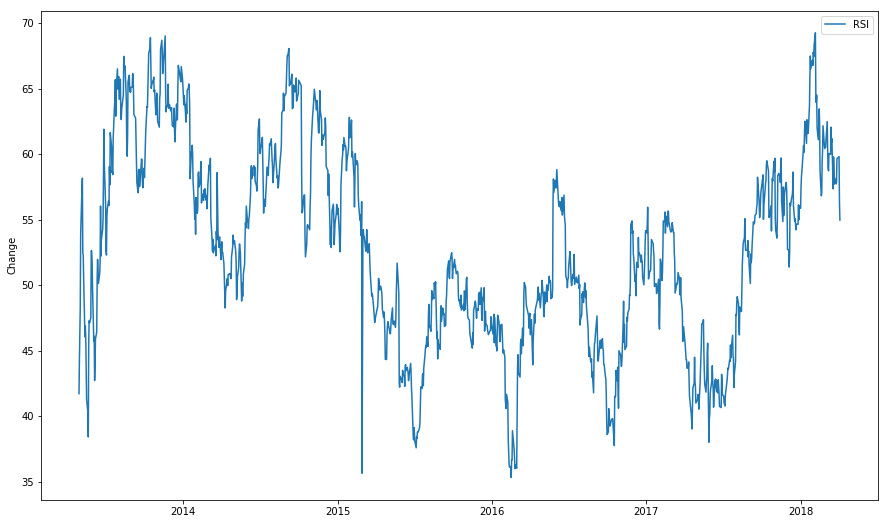

In [73]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(sfd.loc[start_date:end_date, :].index, sfd.loc[start_date:end_date, 'RSI'], label = 'RSI')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Bollinger Bands (30,40,50)

In [74]:
price=df["Close"]

def bbands(price, length=30, numsd=2):
    """ returns average, upper band, and lower band"""
    ave = pd.stats.moments.rolling_mean(price,length)
    sd = pd.stats.moments.rolling_std(price,length)
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

df['ave30'], df['upper30'], df['lower30'] = bbands(df.Close, length=30, numsd=1)
df['ave40'], df['upper40'], df['lower40'] = bbands(df.Close, length=40, numsd=1)
df['ave50'], df['upper50'], df['lower50'] = bbands(df.Close, length=50, numsd=1)

Text(0,0.5,'Change')

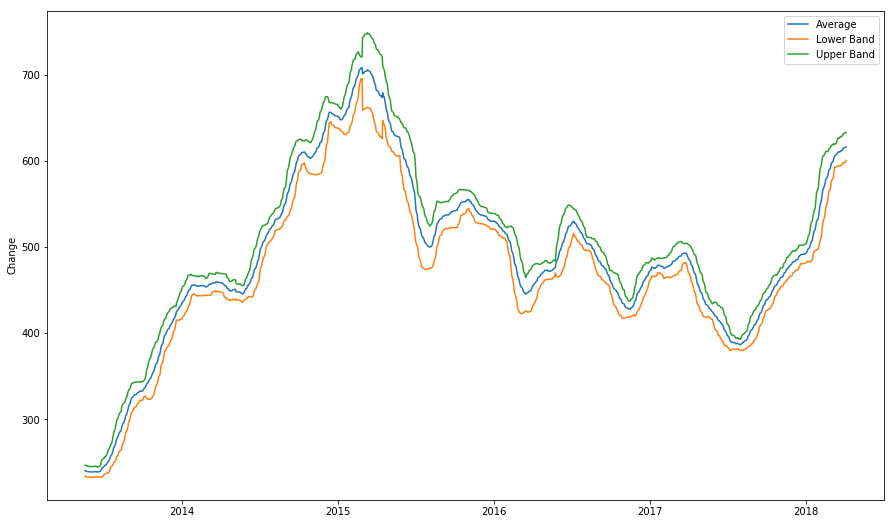

In [75]:
# For 30 days
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ave30'], label = 'Average')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'lower30'], label = 'Lower Band')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'upper30'], label = 'Upper Band')

ax.legend(loc='best')
ax.set_ylabel('Change')

Text(0,0.5,'Change')

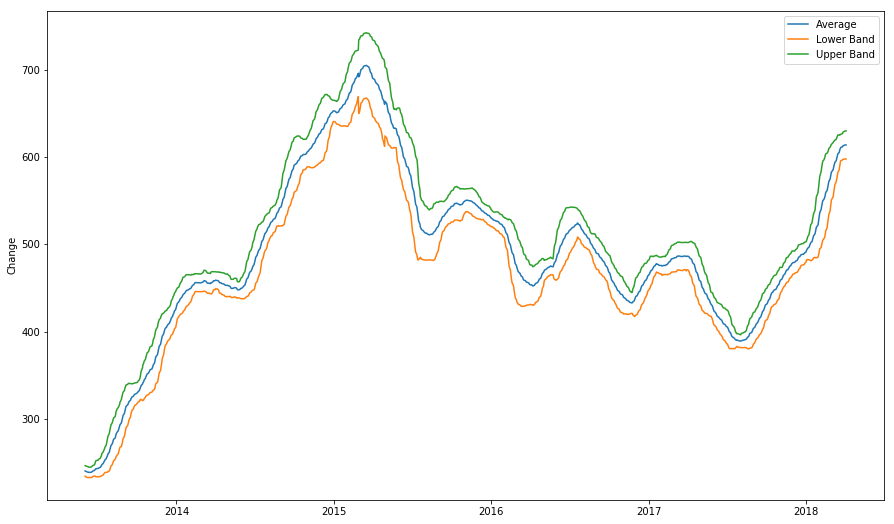

In [76]:
# For 40 days
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ave40'], label = 'Average')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'lower40'], label = 'Lower Band')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'upper40'], label = 'Upper Band')

ax.legend(loc='best')
ax.set_ylabel('Change')

Text(0,0.5,'Change')

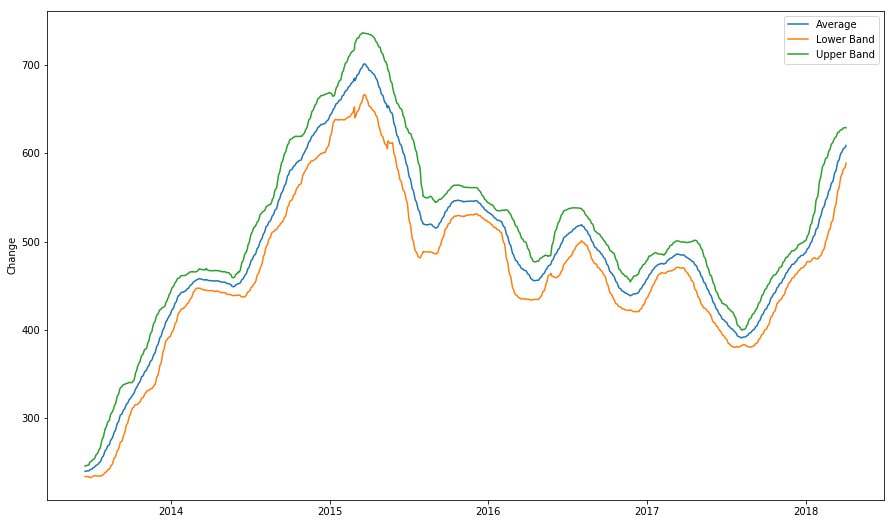

In [77]:
# For 50 days
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ave50'], label = 'Average')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'lower50'], label = 'Lower Band')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'upper50'], label = 'Upper Band')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Stochastic Oscillator

In [78]:
def STOK(close, low, high, n): 
 STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
 STOD = pd.rolling_mean(STOK, 3)
 return STOD

In [79]:
df['%K'] = STOK(df['Close'], df['Low'], df['High'], 14)
df['%D'] = STOD(df['Close'], df['Low'], df['High'], 14)

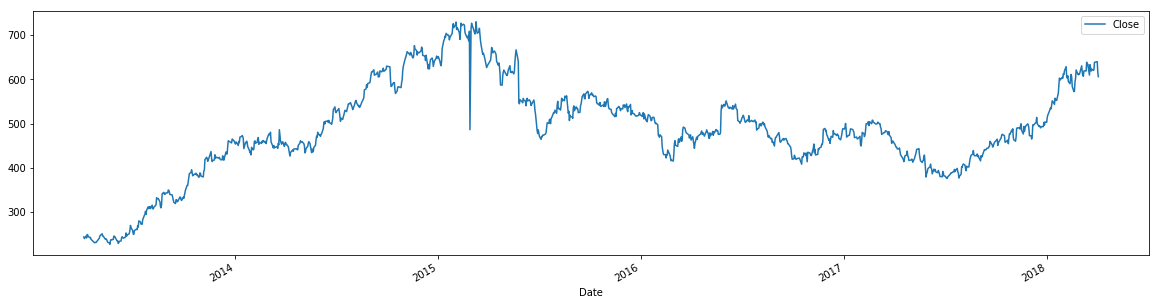

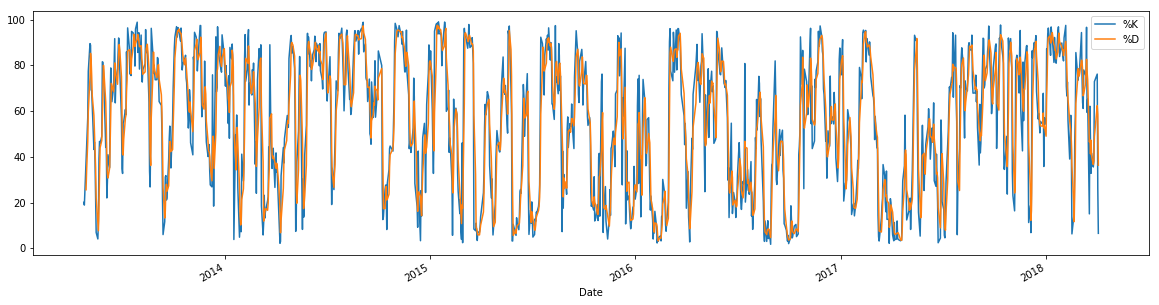

In [80]:
df.plot(y=['Close'], figsize = (20, 5))
df.plot(y=['%K', '%D'], figsize = (20, 5))

## Chande Oscillator

In [81]:
def avg_true_range(df): 
  ind = range(0,len(df))
  indexlist = list(ind)
  df.index = indexlist

  for index, row in df.iterrows():
    if index != 0:
      tr1 = row["High"] - row["Low"]
      tr2 = abs(row["High"] - df.iloc[index-1]["Close"])
      tr3 = abs(row["Low"] - df.iloc[index-1]["Close"])

      true_range = max(tr1, tr2, tr3)
      df.set_value(index,"True Range", true_range)

  df["Avg TR"] = df["True Range"].rolling(min_periods=14, window=14, center=False).mean()
  return df

In [82]:
def chandelier_exit(df):

  df_tr = avg_true_range(df)

  df_tr['rolling_high']= df_tr["High"]
  df_tr['rolling_low'] = df_tr["Low"]

  df_tr['chandelier_long'] = df_tr['rolling_high'] - df_tr["Avg TR"] * 3
  df_tr['chandelier_short'] = df_tr['rolling_low'] - df_tr["Avg TR"] * 3
  fig, ax = plt.subplots(figsize=(15,9))

  ax.plot(df_tr['Date'], df_tr['chandelier_long'], label = 'Chand Long')

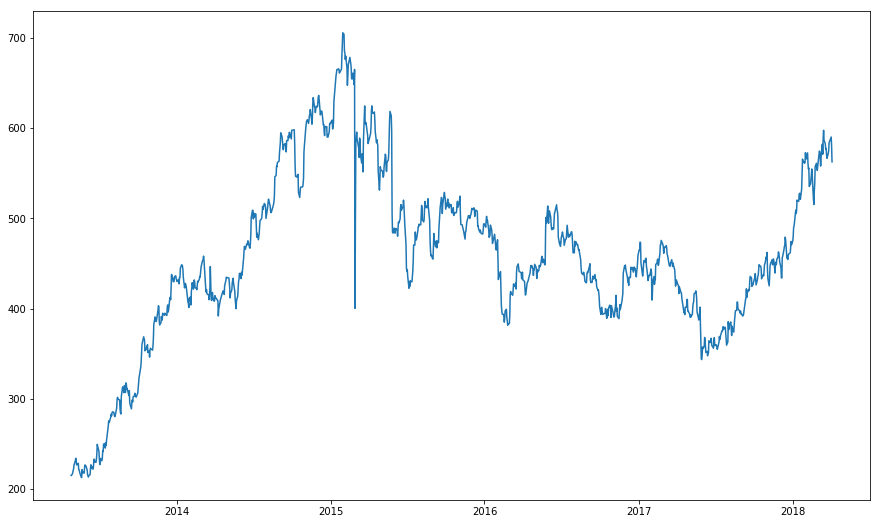

In [83]:
ch=chandelier_exit(df1)

## Commodity Channel Index (30,40,50)

In [84]:
def CCI(data, ndays): 
 TP = (data['High'] + data['Low'] + data['Close']) / 3 
 CCI = pd.Series((TP - pd.rolling_mean(TP, ndays)) / (0.015 * pd.rolling_std(TP, ndays)),
 name = 'CCI')
 data=data.join(CCI)
 return data

In [85]:
cci30=CCI(df,30)
cci40=CCI(df,40)
cci50=CCI(df,50)

In [86]:
cci30

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,...,lower30,ave40,upper40,lower40,ave50,upper50,lower50,%K,%D,CCI
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-04,244.000000,248.225006,240.662994,217.479950,3446784.0,0.000314,0.000010,0.001231,244.250000,231.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-05,245.725006,245.725006,239.274994,214.107101,1188644.0,0.000270,-0.000214,0.001231,240.462006,234.238007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-08,241.449997,247.850006,240.875000,219.027451,1787424.0,0.000290,0.000188,0.001231,245.988007,235.087006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-09,248.037994,248.462006,240.811996,215.287781,1417476.0,0.000318,-0.000252,0.001231,241.787994,242.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-10,244.024994,251.250000,242.011993,222.276535,1055748.0,0.000382,0.000230,0.001231,249.636993,244.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-11,251.250000,252.500000,245.561996,221.865173,892204.0,0.000283,-0.000083,0.001231,249.175003,242.912994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-12,242.500000,247.125000,238.287994,218.147720,1530756.0,0.000371,0.000103,0.001231,245.000000,241.438004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-15,243.500000,245.688004,241.250000,215.911072,766528.0,0.000184,-0.000042,0.001231,242.488007,242.850006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-16,242.250000,245.000000,240.250000,216.512070,776852.0,0.000198,0.000038,0.001231,243.162994,244.462006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0,0.5,'Change')

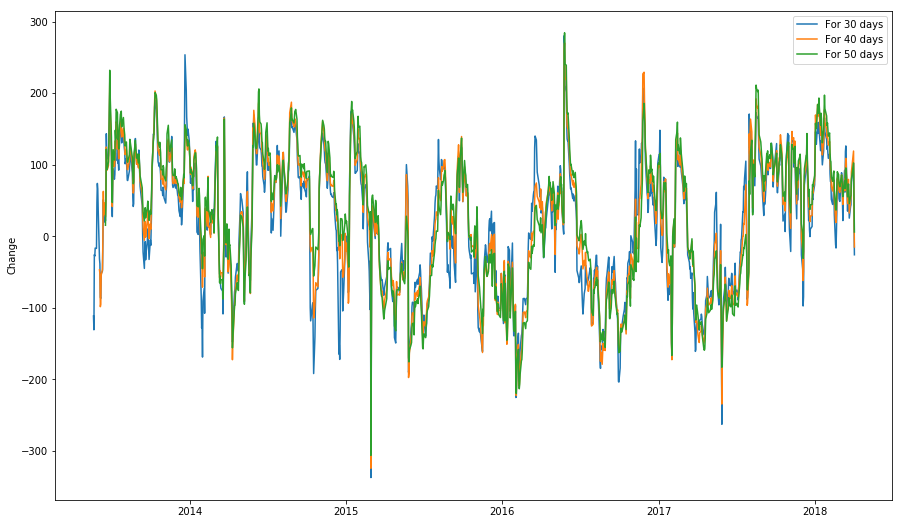

In [87]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(cci30.loc[start_date:end_date, :].index, cci30.loc[start_date:end_date, 'CCI'], label = 'For 30 days')
ax.plot(cci40.loc[start_date:end_date, :].index, cci40.loc[start_date:end_date, 'CCI'], label = 'For 40 days')
ax.plot(cci50.loc[start_date:end_date, :].index, cci50.loc[start_date:end_date, 'CCI'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Chakin Volatility Indicator (30,40,50)

In [88]:
def chaikin_oscillator(data, periods_short=3, periods_long=30, high_col='High',
                       low_col='Low', close_col='Close', vol_col='Volume'):
    ac = pd.Series([])

    for index, row in data.iterrows():
        if row[high_col] != row[low_col]:
            val = ((row[close_col] - row[low_col]) - (row[high_col] - row[close_col])) / (row[high_col] - row[low_col]) * row[vol_col]
        else:
            val = 0
        ac.set_value(index, val)

    ema_long = ac.ewm(ignore_na=False, min_periods=0, com=periods_long, adjust=True).mean()
    ema_short = ac.ewm(ignore_na=False, min_periods=0, com=periods_short, adjust=True).mean()
    data['ch_osc'] = ema_short - ema_long

    return data

In [89]:
ch30=chaikin_oscillator(df,3,30)
ch40=chaikin_oscillator(df,3,40)
ch50=chaikin_oscillator(df,3,50)

Text(0,0.5,'Change')

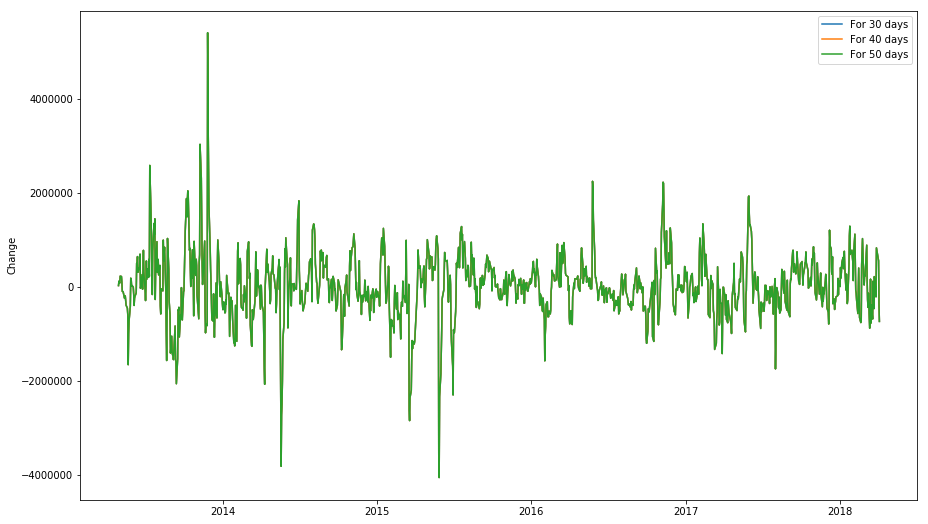

In [90]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ch30.loc[start_date:end_date, :].index, ch30.loc[start_date:end_date, 'ch_osc'], label = 'For 30 days')
ax.plot(ch40.loc[start_date:end_date, :].index, ch40.loc[start_date:end_date, 'ch_osc'], label = 'For 40 days')
ax.plot(ch50.loc[start_date:end_date, :].index, ch50.loc[start_date:end_date, 'ch_osc'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')

#overlapped each other

## Rate of Price Change (30,40,50)

In [91]:
def ROC(data,n):
 N = data['Close'].diff(n)
 D = data['Close'].shift(n)
 ROC = pd.Series(N/D,name='ROC')
 data = data.join(ROC)
 return data 

In [92]:
roc30=ROC(df,30)
roc40=ROC(df,40)
roc50=ROC(df,50)

In [93]:
roc30

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,...,ave40,upper40,lower40,ave50,upper50,lower50,%K,%D,ch_osc,ROC
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-04,244.000000,248.225006,240.662994,217.479950,3446784.0,0.000314,0.000010,0.001231,244.250000,231.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2013-04-05,245.725006,245.725006,239.274994,214.107101,1188644.0,0.000270,-0.000214,0.001231,240.462006,234.238007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-38177.981232,NaN
2013-04-08,241.449997,247.850006,240.875000,219.027451,1787424.0,0.000290,0.000188,0.001231,245.988007,235.087006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98546.637359,NaN
2013-04-09,248.037994,248.462006,240.811996,215.287781,1417476.0,0.000318,-0.000252,0.001231,241.787994,242.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-49074.940837,NaN
2013-04-10,244.024994,251.250000,242.011993,222.276535,1055748.0,0.000382,0.000230,0.001231,249.636993,244.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84091.448303,NaN
2013-04-11,251.250000,252.500000,245.561996,221.865173,892204.0,0.000283,-0.000083,0.001231,249.175003,242.912994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74535.624146,NaN
2013-04-12,242.500000,247.125000,238.287994,218.147720,1530756.0,0.000371,0.000103,0.001231,245.000000,241.438004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170861.376966,NaN
2013-04-15,243.500000,245.688004,241.250000,215.911072,766528.0,0.000184,-0.000042,0.001231,242.488007,242.850006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65253.909907,NaN
2013-04-16,242.250000,245.000000,240.250000,216.512070,776852.0,0.000198,0.000038,0.001231,243.162994,244.462006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72408.692242,NaN


Text(0,0.5,'Change')

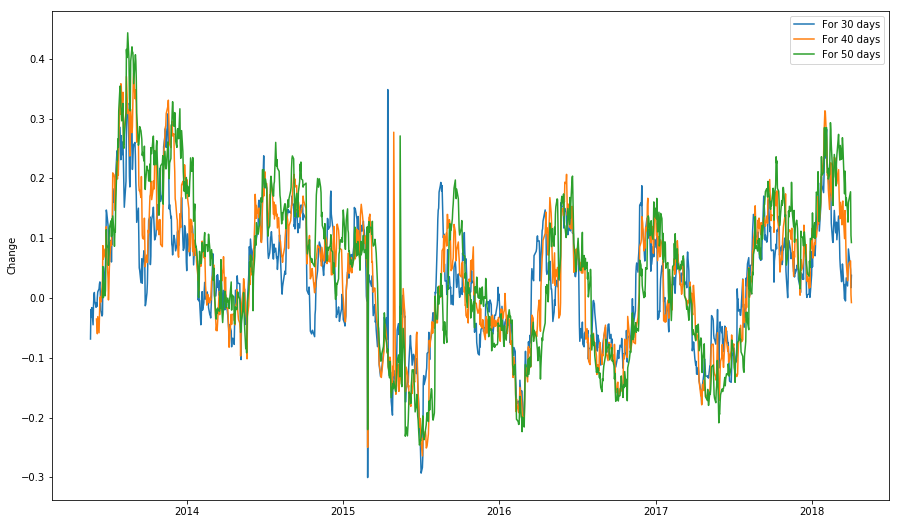

In [94]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(roc30.loc[start_date:end_date, :].index, roc30.loc[start_date:end_date, 'ROC'], label = 'For 30 days')
ax.plot(roc40.loc[start_date:end_date, :].index, roc40.loc[start_date:end_date, 'ROC'], label = 'For 40 days')
ax.plot(roc50.loc[start_date:end_date, :].index, roc50.loc[start_date:end_date, 'ROC'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Rate of Volume Change (30,40,50)


In [95]:
def ROC(data,n):
 N = data['Volume'].diff(n)
 D = data['Volume'].shift(n)
 ROC = pd.Series(N/D,name='ROC')
 data = data.join(ROC)
 return data 

In [96]:
roc30=ROC(df,30)
roc40=ROC(df,40)
roc50=ROC(df,50)

In [97]:
roc30

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,...,ave40,upper40,lower40,ave50,upper50,lower50,%K,%D,ch_osc,ROC
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-04,244.000000,248.225006,240.662994,217.479950,3446784.0,0.000314,0.000010,0.001231,244.250000,231.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2013-04-05,245.725006,245.725006,239.274994,214.107101,1188644.0,0.000270,-0.000214,0.001231,240.462006,234.238007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-38177.981232,NaN
2013-04-08,241.449997,247.850006,240.875000,219.027451,1787424.0,0.000290,0.000188,0.001231,245.988007,235.087006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98546.637359,NaN
2013-04-09,248.037994,248.462006,240.811996,215.287781,1417476.0,0.000318,-0.000252,0.001231,241.787994,242.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-49074.940837,NaN
2013-04-10,244.024994,251.250000,242.011993,222.276535,1055748.0,0.000382,0.000230,0.001231,249.636993,244.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84091.448303,NaN
2013-04-11,251.250000,252.500000,245.561996,221.865173,892204.0,0.000283,-0.000083,0.001231,249.175003,242.912994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74535.624146,NaN
2013-04-12,242.500000,247.125000,238.287994,218.147720,1530756.0,0.000371,0.000103,0.001231,245.000000,241.438004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170861.376966,NaN
2013-04-15,243.500000,245.688004,241.250000,215.911072,766528.0,0.000184,-0.000042,0.001231,242.488007,242.850006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65253.909907,NaN
2013-04-16,242.250000,245.000000,240.250000,216.512070,776852.0,0.000198,0.000038,0.001231,243.162994,244.462006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72408.692242,NaN


Text(0,0.5,'Change')

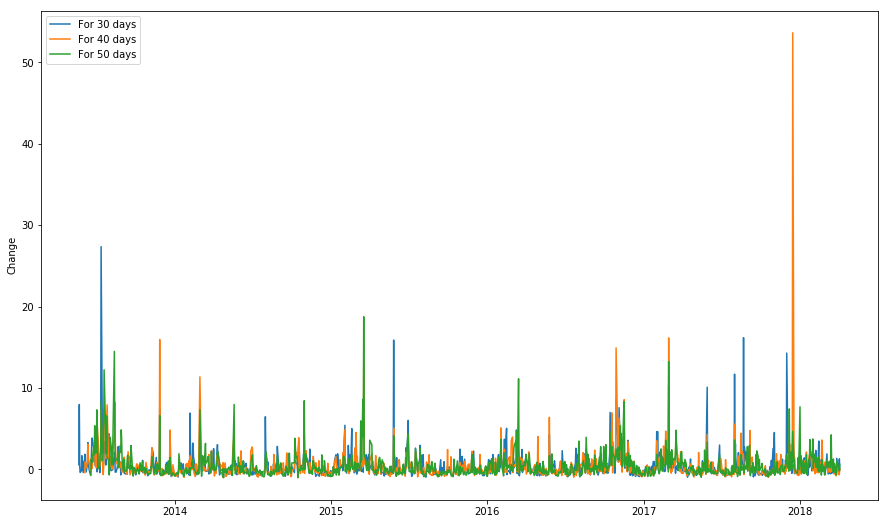

In [98]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(roc30.loc[start_date:end_date, :].index, roc30.loc[start_date:end_date, 'ROC'], label = 'For 30 days')
ax.plot(roc40.loc[start_date:end_date, :].index, roc40.loc[start_date:end_date, 'ROC'], label = 'For 40 days')
ax.plot(roc50.loc[start_date:end_date, :].index, roc50.loc[start_date:end_date, 'ROC'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')